Data obtenida de kaggle de https://www.kaggle.com/sriharipramod/bank-loan-classification

* El objetivo es determnar si la persona clasifica para un prestamo personal (personal Loan)
* Se usaran distintos metodos de clasificacion y se determinara cual tiene un mejor rendimiento.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from IPython.display import Image


In [2]:
data=pd.read_csv(r'C:\Users\56974\GitHub\archivos mios\clasificacion\personal loan banco\UniversalBank.csv')

FileNotFoundError: [Errno 2] File C:\Users\56974\GitHub\archivos mios\clasificacion\personal loan banco\UniversalBank.csv does not exist: 'C:\\Users\\56974\\GitHub\\archivos mios\\clasificacion\\personal loan banco\\UniversalBank.csv'

In [ ]:
data.head()

# Examinando la información

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe()

* Al observar el componente count, notamos como no se presentan valores nulos, de todas formas se confirmará mas adelante.
* El dataset no presenta mayor informacion de las variables, por lo tanto pondre lo que parece la deduccion mas obvia de estas: .- ID: clasificacion unica del cliente
       .- ZIP code: codigo postal 
       .- Family: cantidad de personas por familia
       .- CCAvf: promedio mensual del gasto en la tarjeta de credito
       .- CD Account: certificado de deposito
       
       

In [ ]:
#promedio de los datos segun si obtienen el personal loan o no.
data.groupby('Personal Loan').mean()

* Se ve como el promedio en la edad es similar tanto para recibir como rechazar el prestamo, por lo tanto no parece ser determinante la edad en la decision final.

* se ve como los ingresos resultan ser influyentes en la toma de decision.

* de forma similar tener una alta hipoteca (mortgage) y promedio de la tarjeta de credito (ccavg) parece influir en el personal loan. Tambien aunque menos notorio el certificado de deposito

In [ ]:
#promedio de los datos segun si el nivel de educacion.
data.groupby('Education').mean()

* se ve como los ingresos promedio son mayores para la educacion 1, si asumimos que mas educacion equivale a mayor ingreso, la educacion 1 debera ser de nivel universitario o superior.

* de igual forma se aprecia que las variables que estan asociadas a tener un mayor ingreso tambien son mas altas en la educacion 1, como ccavg y mortgage

In [ ]:
# comprobar que no existan valores nulos
data.isnull().sum()

In [ ]:
#comprobaremos que no hayan columnas repetidas en el dataframe
data[data.duplicated(keep=False)]

In [ ]:
data.shape

# Visualización del data 

In [ ]:
data.head()

In [ ]:
#mapa de calor se ve cortado por problemas en libreria matplotlib 3.1.1
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot = True,)
plt.title('Mapa de calor variables del dataset', fontsize = 20)

* Se ve como edad y experiencia tiene una gran correlacion, es un valor esperado ya que la tendencia deberia ser que una persona con más edad deberia llevar más tiempo trabajando.

* Se aprecia una correlacion muy negativa entre educacion e ingresos, otro valor esperado ya que mayor educacion puede ir de la mano con mejores puestos de trabajo y por lo tanto mejores salarios.

* Se observo una correlacion positiva para ingresos y los prestamos, tmabien es de esperar que los bancos realicen prestamos en base a los ingresos de sus clientes.

* Otra relacion esperada es la correlacion positiva entre los ingresos y el promedio de uso de la tarjeta de credito (CCavg) 

* Por ultimo, en cuanto a ingresos, una correlacion no tan predecible es la negativa entre estos y la cantidad de familiares.

* Se aprecia una correlacion positiva entre los prestamos y el CCavg y el certificado de deposito (CD)

In [ ]:
#Cantidad de valores unicos para el codigo postal
len(data['ZIP Code'].unique())

Text(0, 0.5, 'ingresos')

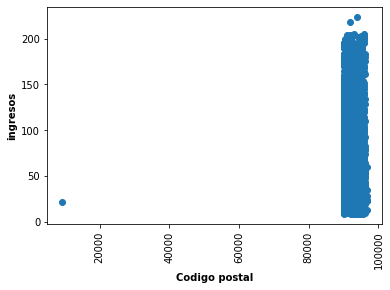

In [24]:
#grafico de dispercion de codigo postal vs ingresos (codigo postal va desde 9307 hasta 96651)
plt.scatter(data['ZIP Code'],data['Income'])
plt.xticks(rotation=90)
plt.xlabel("Codigo postal",fontweight = 'bold')
plt.ylabel("ingresos",fontweight = 'bold')

* vemos que existe un valor alejado del resto, al ver la descripcion de la data es el valor minimo y como es el unico que existe se asume como un error en la data. Por lo tanto se eliminara el conjunto de datos correspondiente a ese valor y se graficara nuevamente

In [25]:
#comprobamos que ese valor es unico en el dataset
(data['ZIP Code']==9307).sum()

1

In [26]:
data = data.drop(data[data['ZIP Code']==9307].index)
data = data.reset_index(drop=True)
#ahora vemos como el valor minimo en zipcode cambio a 90005
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.923185,45.337267,20.103621,73.784757,93169.275455,2.396079,1.938206,1.880776,56.510102,0.096019,0.104421,0.060412,0.596719,0.293859
std,1443.354188,11.464033,11.468892,46.032281,1759.630610,1.147554,1.747731,0.839804,101.720837,0.294647,0.305836,0.238273,0.490605,0.455574
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1251.500000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2501.000000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.500000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
#y vemos que se ha eliminado una columna del dataframe
data.shape

(4999, 14)

In [28]:
print('Cantidad de Separacines en el eje x:',(max(data['ZIP Code'])-min(data['ZIP Code']))/467)
print('Separacion entre cada valor de x:',(max(data['ZIP Code'])-min(data['ZIP Code']))/15)
print('Valor maximo y minimo de la columna ZIP code:',max(data['ZIP Code']),min(data['ZIP Code']))

Cantidad de Separacines en el eje x: 14.231263383297645
Separacion entre cada valor de x: 443.06666666666666
Valor maximo y minimo de la columna ZIP code: 96651 90005


Text(0, 0.5, 'ingresos')

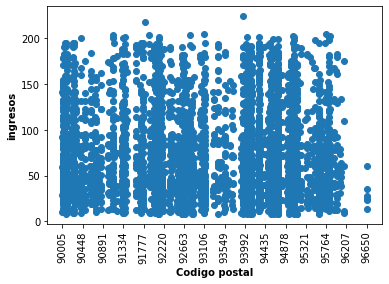

In [29]:
#grafico de dispercion de codigo postal vs ingresos (codigo postal va desde 9307 hasta 96651)
plt.scatter(data['ZIP Code'],data['Income'])
x=list(range(90005, 96651, 443))# valor minimo, maximo y el aumento entre cada uno para lograr 15 espacios aprox
plt.xticks([i for i in x],rotation=90) 
plt.xlabel("Codigo postal",fontweight = 'bold')
plt.ylabel("ingresos",fontweight = 'bold')

* Como el ZIP Code representa un lugar en especifico, notamos como este es independiente de los ingresos, es decir, independiente del lugar en que nos fijemos habra gente con mayores ingresos que otros. La excepción seria el ultimo valor

Text(0.5, 1.0, 'Relacion prestamo personal, por Educacion')

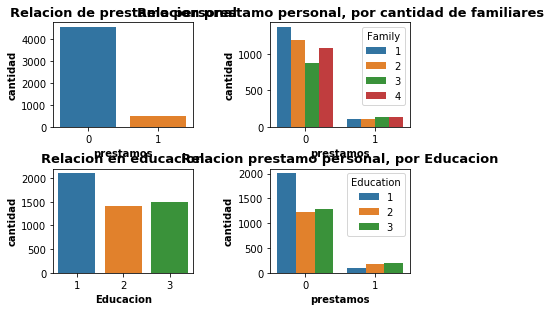

In [30]:

plt.subplot(2,2,1)
sns.countplot(x='Personal Loan',data=data)
plt.xlabel("prestamos",fontweight = 'bold')
plt.ylabel("cantidad",fontweight = 'bold')
plt.title('Relacion de prestamo personal', fontsize = 13, fontweight = 'bold')

plt.subplot(2,2,2)
plt.tight_layout()
sns.countplot(x='Personal Loan',data=data,hue='Family')
plt.xlabel("prestamos",fontweight = 'bold')
plt.ylabel("cantidad",fontweight = 'bold')
plt.title('Relacion prestamo personal, por cantidad de familiares', fontsize = 13, fontweight = 'bold')

plt.subplot(2,2,3)
sns.countplot(x='Education',data=data,)
plt.xlabel("Educacion",fontweight = 'bold')
plt.ylabel("cantidad",fontweight = 'bold')
plt.title('Relacion en educacion', fontsize = 13, fontweight = 'bold')

plt.subplot(2,2,4)
sns.countplot(x='Personal Loan',data=data,hue='Education')
plt.xlabel("prestamos",fontweight = 'bold')
plt.ylabel("cantidad",fontweight = 'bold')
plt.title('Relacion prestamo personal, por Educacion', fontsize = 13, fontweight = 'bold')


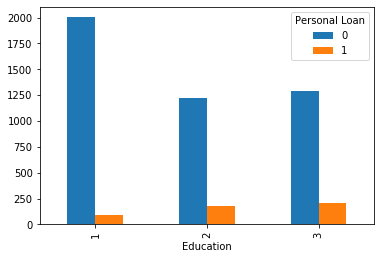

In [31]:
#otro grafico de educacion vs personal loan solo por variar la forma en que se pueden hacer y visualizar.
pd.crosstab(data['Education'],data['Personal Loan']).plot(kind='bar')

In [32]:
print((data['Personal Loan']==0).sum())
print((data['Personal Loan']==1).sum())

4519
480


* vemos que existe una gran diferencia entre gente que se le otorga un prestamo personal y gente que no (prestamos = 10.6% del total). Esto puede generar un problema de sesgo a la hora de realizar el algoritmo (skewed classes)(recordar: "metricas de error para clases sesgadas")


* por lo tanto una buena forma de evaluar el algoritmo sera utilizando precision y recall


* Si fuesemos ejecutivos del banco y quisieramos asegurar que los prestamos se hagan solo a personas que realmente traigan un beneficio, se podria aumentar el umbral de decision, es decir, y=1 <=> h(x)>= umbral, con umbral >= 0,7 por ejemplo, o mas segun se quisiera asegurar los beneficios para el banco, dependeria de lo que se desea como empresa. Esto aumentaria la precision y disminuiria el Recall.


* La decision de lo anterior puede basarse en otra metrica, el F1 score.

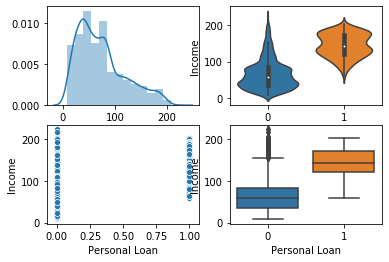

In [33]:
#regal de sturges para determinar bins del histograma c=1+log2(M) con M= tamaño de la muestra
c=math.ceil(1+ math.log2(len(data['Income'])))

plt.subplot(2,2,1)
sns.distplot(data['Income'],bins=c)

plt.subplot(2,2,2)
sns.violinplot(data['Personal Loan'], data['Income'])

plt.subplot(2,2,3)
sns.scatterplot(x='Personal Loan', y='Income', data=data)

plt.subplot(2,2,4)
sns.boxplot(x=data['Personal Loan'], y=data['Income'])



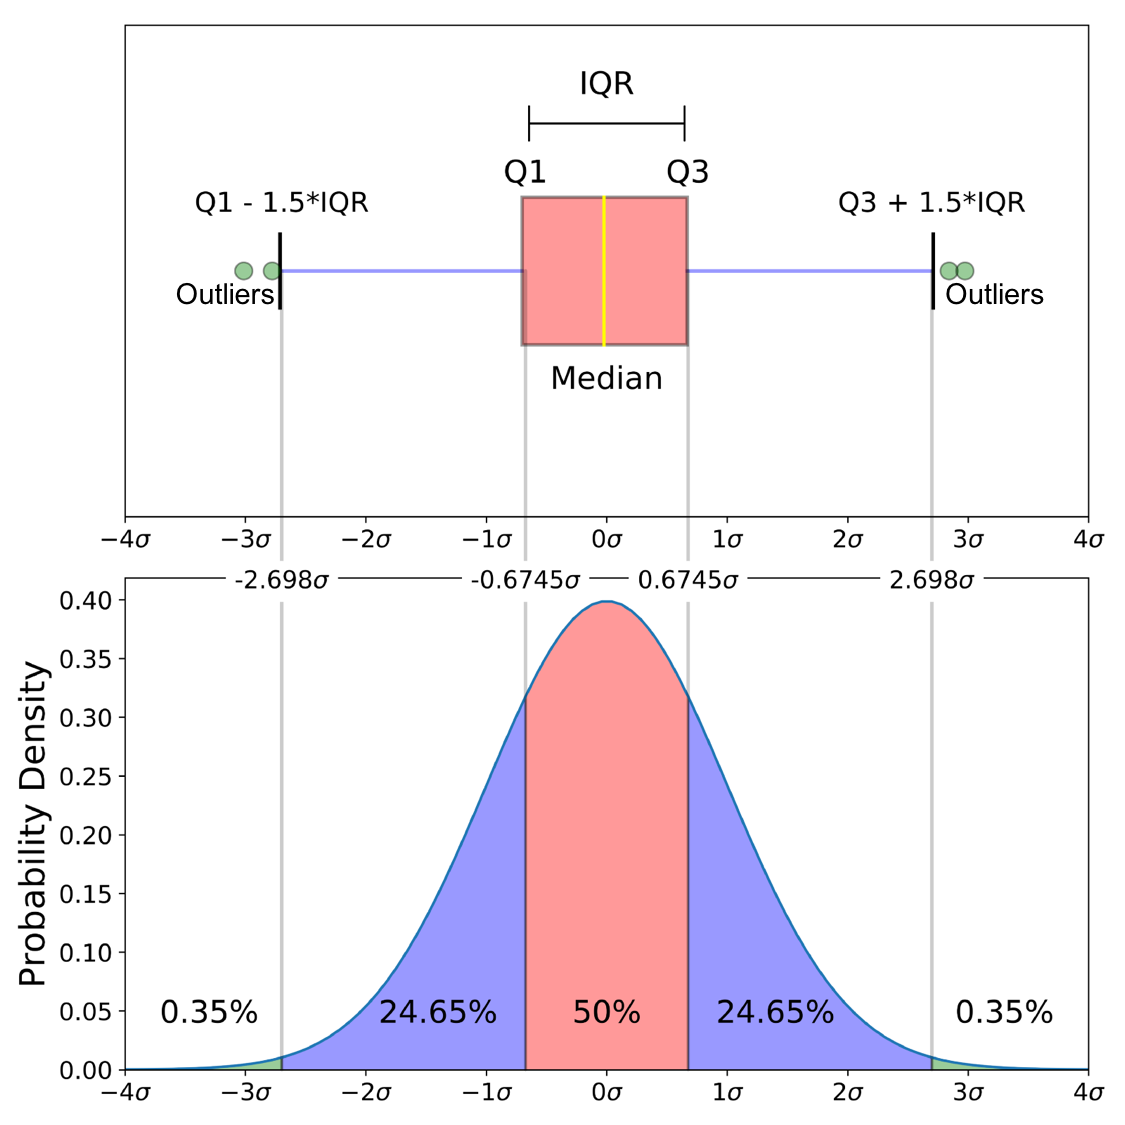

In [34]:
#recordar
Image(filename=r'C:\Users\56974\GitHub\archivos mios\clasificacion\personal loan banco\grafica de cajas y distribucion.png')

#imagen obtenida de https://www.it-swarm.dev/es/python/graficas-de-caja-en-matplotlib-marcadores-y-valores-atipicos/1040918791/

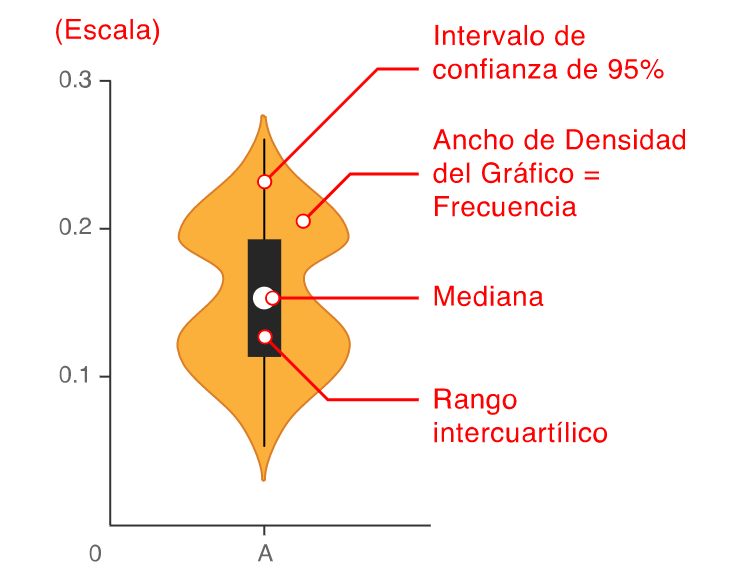

In [35]:
# Fuente: https://datavizcatalogue.com/ES/metodos/diagrama_de_violin.html#:~:text=Un%20diagrama%20de%20viol%C3%ADn%20se,de%20distribuci%C3%B3n%20de%20los%20datos.
Image(filename=r'C:\Users\56974\GitHub\archivos mios\clasificacion\personal loan banco\diagrama violin.png')

#  Algoritmos de clasificacion

* regresion logistica

* decision tree (arbol de decision)

* random forest

* support vector machine (SVM)

* k-Nearest Neighbors (k vecinos mas cercanos)



## regresion logistica

### seleccion de variables a usar en el modelo 

In [13]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [14]:
#seleccion de columnas
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

* Se excluira la columna de ID ya que representa a una persona y no tiene valor para la prediccion es unico para cada persona y ZIP Code ya que se vio que no tiene gran importancia para el estudio

In [15]:
X=data[['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]
Y=data['Personal Loan']

In [16]:
n=11
lr=LogisticRegression()

In [17]:
#Selección estable de variables independientes con RFE (Recursive Feature Elimination)
rfe=RFE(lr,n)
rfe= rfe.fit(X,Y)

D:\Users\56974\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]


* las variables que contienen el valor True o 1 (son dos formas de verlo) son las que estan seleccionadas para ser parte del modelo, en este caso todas pueden ser parte de él.

* no ocurrio en este caso, pero si dieran muchos false en el support, se podrian elegir los que tengan ranking cercano a 1 para aumentar el numero de variables 

* en caso de que fueran muchas variables y muchos valores diferentes se podrian hacer un zip de los 3 valores para tener una mejor visual de estos

In [21]:
#ejemplo de zip descrito anteriormente
z=zip(X,rfe.support_,rfe.ranking_)
list(z)

[('Age', True, 1),
 ('Experience', True, 1),
 ('Income', True, 1),
 ('Family', True, 1),
 ('CCAvg', True, 1),
 ('Education', True, 1),
 ('Mortgage', True, 1),
 ('Securities Account', True, 1),
 ('CD Account', True, 1),
 ('Online', True, 1),
 ('CreditCard', True, 1)]

### Implementacion del modelo, primero con statsmodels.api

In [19]:
# lo que se suele hacer es usar statsmodel para crear un modelo y "afinarlo" y luego de lograr elmas optimo utilizar 
#sklearn para crear el modelo final ya que tiene otras funcionalidades mas profundas.
import statsmodels.api as sm

In [20]:
logistic_model= sm.Logit(Y,X)
result= logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.133520
         Iterations 9


In [21]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit             Pseudo R-squared:  0.578    
Dependent Variable:  Personal Loan     AIC:               1357.1997
Date:                2020-07-05 18:28  BIC:               1428.8888
No. Observations:    5000              Log-Likelihood:    -667.60  
Df Model:            10                LL-Null:           -1581.0  
Df Residuals:        4989              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.5068   0.0220 -23.0285 0.0000 -0.5500 -0.4637
Experience          0.5080   0.0244  20.8289 0.0000  0.4602  0.5558
Income              0.0515   0.0025  20.5369 0.0000  0.0466  0.0565
Family              0.6323   0.0714   8.8551 0.0000  0.4923  0.7723
CCAvg               0.1115   0.0388   2.8707 0.0041  0.0354  0.1876
Education           1.7301   0.1111  15.5765 0.0000  1.5124  1.9477
Mortgage            0.0006   0.0005   1.0398 0.2984 -0.0005  0.0016
Securities Account -1.0120   0.2831  -3.5745 0.0004 -1.5669 -0.4571
CD Account          3.8155   0.3186  11.9772 0.0000  3.1911  4.4399
Online             -0.7169   0.1539  -4.6585 0.0000 -1.0186 -0.4153
CreditCard         -1.1676   0.2013  -5.8008 0.0000 -1.5621 -0.7731
===================================================================

"""

* AIC y BIC se usan para comparar las eficiencias en varios modelos
* recordar que el P valor se usa para contrastar la hipotesis nula , es decir, mientras mas pequeño es el P valor esa variable es mas significativa para el modelo.

* el unico P valor alto parece ser el de mortgage por lo que su relevancia en el modelo podria llegar a ser nula

### Implementacion del modelo, con sklearn

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=42)

In [35]:
Regresion_logistica=LogisticRegression()
Regresion_logistica.fit(X_train,Y_train)

D:\Users\56974\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#entrega la probabilidad que da el modelo para estar seguro de si debe predecir como 1 o 0
y_probs= Regresion_logistica.predict_proba(X_test)
y_probs

array([[9.99721688e-01, 2.78312160e-04],
       [6.70020763e-01, 3.29979237e-01],
       [9.64680792e-01, 3.53192082e-02],
       ...,
       [9.92661273e-01, 7.33872695e-03],
       [9.61678116e-01, 3.83218839e-02],
       [1.50276874e-02, 9.84972313e-01]])

* la primera columna define que tan seguro esta el modelo de lo que predice, mientras la segunda columna es el valor que predijo, por lo tanto como no hemos cambiado el threshold sobre 0,5 es si y bajo es no (1,0)

In [37]:
#prediciones del modelo (ahora resultados no probabilidades)
predicciones= Regresion_logistica.predict(X_test)
predicciones

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [38]:
metrics.accuracy_score(Y_test,predicciones)

0.9493333333333334

* es decir el 94% de los casos coinciden 

* si aun asi, el 94% de acierto es poco y se necesita más (para captar la mayor cantidad de personas a las que convenga dar (o no) un prestamos) se podria cambiar el umbral como ya se dijo antes

In [39]:
#cambiando el threshold
prob=y_probs[:,1]
prob_df= pd.DataFrame(prob)
umbral=0.4
prob_df['predicciones']=np.where(prob_df[0]>umbral,1,0)
prob_df.head()

,0,predicciones
0,0.000278,0
1,0.329979,0
2,0.035319,0
3,0.000308,0
4,0.001811,0


In [40]:
metrics.accuracy_score(Y_test,prob_df['predicciones'])

0.9506666666666667

* al probar distintos valores de umbral, notamos que el mas optimo al usar 0.5

### Validacion cruzada regresion logistica

K fold cross validation

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
#usaremos el k-fold cross validation
scores = cross_val_score(Regresion_logistica,X,Y,scoring='accuracy',cv=12) #cv=12 es la cantidad de iteraciones a realizar
scores

D:\Users\56974\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\56974\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\56974\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\56974\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\56974\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.95923261, 0.94484412, 0.95203837, 0.93764988, 0.94724221,
       0.95683453, 0.94964029, 0.9616307 , 0.94951923, 0.94711538,
       0.96394231, 0.9375    ])

In [43]:
scores.mean()

0.950599136075755

* como el resultado de la media de hacer CV es cercano al resultado obtenido por el modelo hecho en un principio, se concluye que el modelo generaliza bien.

* tambien se observa que el promedio general es cercano a los promedios de error obtenidos en cada iteracion del CV

### Matriz de confusion y curva ROC para la regresion logistica

* Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación.

In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [45]:
confusion_matrix(Y_test, predicciones)

array([[1327,   16],
       [  60,   97]], dtype=int64)

In [46]:
espc_1, sensi,thresholds =metrics.roc_curve(Y_test,prob)

Área bajo la curva ROC = 0.965577587964961


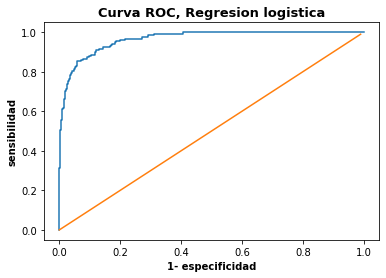

In [47]:
plt.plot(espc_1,sensi)#ploteo curva roc
diagonalx=[i*0.01 for i in range(100)]#para crear la diagonal
diagonaly=[i*0.01 for i in range(100)]#para crear la diagonal
plt.plot(diagonalx,diagonaly)
plt.xlabel("1- especificidad",fontweight = 'bold')
plt.ylabel("sensibilidad",fontweight = 'bold')
plt.title('Curva ROC, Regresion logistica', fontsize = 13, fontweight = 'bold')
#area bajo la curva (auc)
auc= metrics.auc(espc_1,sensi)
print('Área bajo la curva ROC =',auc)

In [48]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(Y_test, predicciones, target_names=['No','Si']))

              precision    recall  f1-score   support

          No       0.96      0.99      0.97      1343
          Si       0.86      0.62      0.72       157

    accuracy                           0.95      1500
   macro avg       0.91      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500



* Precision nos da la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?

* Recall nos da la cantidad: ¿qué porcentaje de la clase positiva hemos sido capaces de identificar?

* F1 combina Precision y Recall en una sola medida

* La Matriz de Confusión indica qué tipos de errores se cometen

### Decision tree y random forest

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#min_samples_split representa el numero minimo de observaciones para que el nodo se divida en un subnodo 
#sin especificar por defecto es 2, se especifica para evitar overfiting
tree= DecisionTreeClassifier(criterion='entropy',min_samples_split=20, random_state=99)
tree.fit(X_train,Y_train)

In [ ]:
predicciones_tree= tree.predict(X_test)
predicciones_tree

In [ ]:
confusion_matrix(Y_test, predicciones_tree)

In [ ]:
metrics.accuracy_score(Y_test,predicciones_tree)

* creamos la matriz de confusión para el árbol de decisión, vemos como tiene mas aciertos que la regresion logistica

### visualizacion del árbol de decisión

In [50]:
#graphviz para plotear archivos .dot
from sklearn.tree import export_graphviz

In [ ]:
#creando fichero .dot, guardandolo en la direccion escrita
with open(r'C:\Users\56974\GitHub\archivos mios\clasificacion\personal loan banco\arbol_decision1.dot','w') as dotfile:

    export_graphviz(tree, out_file=dotfile, feature_names=X_train.columns)
    dotfile.close()


In [51]:
#graphviz para plotear archivos .dot
import os
from graphviz import Source

In [ ]:
#abriendo y leyendo el fichero .dot para la visualizacion
file = open(r'C:\Users\56974\GitHub\archivos mios\clasificacion\personal loan banco\arbol_decision1.dot','r')
text= file.read()

In [ ]:
Source(text)

* recordar: cuanto menor es la entropia mejor (queda mejor clasificada la info).

* la lectura es hacia la izquierda valores True y derecha los False en todos los niveles

* longitud de 9 para el árbol

### Validacion cruzada y poda

In [52]:
from sklearn.model_selection import KFold

In [ ]:
for i in range(1,11):
    tree2= DecisionTreeClassifier(criterion='entropy',max_depth=i ,min_samples_split=20, random_state=99)
    tree2.fit(X,Y)
    cv_tree= KFold( n_splits=5, shuffle=True, random_state=99)
    scores_tree= cross_val_score(tree2,X,Y,cv=cv_tree, scoring='accuracy',n_jobs=1)
    score_mean= np.mean(scores_tree)
    print('Score para i=',i,' es de :',score_mean)

* vemos que desde i =4 el score se mantiene casi constante en 0,98 y decimales

* comparandolo con el que se hizo en el principio el resultado es similar en cuanto a score, pero en el primero se hicieron 9 ramas por lo que se podria realizar con 4 y obtener resultados similares y a menos recursos

In [ ]:
# creare el árbol para 4 ramas
tree_4= DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=20, random_state=99)
tree_4.fit(X_train,Y_train)

In [ ]:
predicciones_tree_4= tree_4.predict(X_test)
predicciones_tree_4

In [ ]:
confusion_matrix(Y_test, predicciones_tree_4)

In [ ]:
metrics.accuracy_score(Y_test,predicciones_tree_4)

### Curva ROC decision tree

In [ ]:
y_probs_tree= tree_4.predict_proba(X_test)
prob_tree=y_probs_tree[:,1]
espc_1_tree, sensi_tree,thresholds_tree =metrics.roc_curve(Y_test,prob_tree)

plt.plot(espc_1_tree,sensi_tree)#ploteo curva roc para el árbol
diagonalx=[i*0.01 for i in range(100)]#para crear la diagonal
diagonaly=[i*0.01 for i in range(100)]#para crear la diagonal
plt.plot(diagonalx,diagonaly)
plt.xlabel("1- especificidad",fontweight = 'bold')
plt.ylabel("sensibilidad",fontweight = 'bold')
plt.title('Curva ROC, decision tree', fontsize = 13, fontweight = 'bold')
#area bajo la curva (auc)
auc_tree= metrics.auc(espc_1_tree,sensi_tree)
print('Área bajo la curva ROC para árbol =',auc_tree)

In [ ]:
#para finalizar, visualizacion del nuevo árbol 
with open(r'C:\Users\56974\GitHub\archivos mios\clasificacion\personal loan banco\arbol_decision_4.dot','w') as dotfile:

    export_graphviz(tree_4, out_file=dotfile, feature_names=X_train.columns)
    dotfile.close()
file_4 = open(r'C:\Users\56974\GitHub\archivos mios\clasificacion\personal loan banco\arbol_decision_4.dot','r')
text_4= file_4.read()
Source(text_4)

# Random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#n_jobs= número de trabajos simultaneos; oobs_score= True para obtener resultados de la clasificacion;
# n_estimators= 10 para definir el número de árboles que se crearan 
forest= RandomForestClassifier(n_jobs=2,criterion='entropy', oob_score=True,n_estimators= 100,random_state=99)
forest.fit(X,Y)

In [ ]:
#muestra los valores que consensuaron (recordar que en random forest para clasificar es por votos y no promedio
# para la decision final)
forest.oob_decision_function_

In [ ]:
#para ver la precision del random forest
forest.oob_score_

* el resultado obtenido es un poco mayor que el obtenido en el árbol de decision por si solo, esto puede variar al hacer variar el n_estimators

* Aún si accuracy fuera menor,la técnica random forest es mucho menos sensible a la variación en el conjunto de aprendizaje.

* Por lo tanto,la técnica de random forest no siempre nos va a conducir a sistemas con mayor acierto de media que cualquier árbol de decisión. Sin embargo, los random forest garantizan una mayor estabilidad. Estas ventajas son suficientemente importantes para justificar que la complejidad adicional merezca la pena.

* si ademas con estos datos se analizara una serie temporal, el random forest asumiria menos riesgo, lo que generaría un drawdown mucho más controlado.

In [ ]:
predicciones_RF= forest.predict(X_test)
predicciones_RF

In [ ]:
confusion_matrix(Y_test, predicciones_RF)

### Curva ROC random forest

In [ ]:
y_probs_RF= forest.predict_proba(X_test)
prob_RF=y_probs_RF[:,1]
espc_1_RF, sensi_RF,thresholds_RF =metrics.roc_curve(Y_test,prob_RF)

plt.plot(espc_1_RF,sensi_RF)#ploteo curva roc para random forest
diagonalx=[i*0.01 for i in range(100)]#para crear la diagonal
diagonaly=[i*0.01 for i in range(100)]#para crear la diagonal
plt.plot(diagonalx,diagonaly)
plt.xlabel("1- especificidad",fontweight = 'bold')
plt.ylabel("sensibilidad",fontweight = 'bold')
plt.title('Curva ROC, random forest', fontsize = 13, fontweight = 'bold')
#area bajo la curva (auc)
auc_RF= metrics.auc(espc_1_RF,sensi_RF)
print('Área bajo la curva ROC para random forest =',auc_RF)

# SVM Classifier

In [54]:
from matplotlib import style

from sklearn import svm
from sklearn.model_selection import GridSearchCV

este erra el original q nunca termino de correr
en kernel usare solo linear debido a la velocidad de mi pc (lento) para reducir los tiempos.

param={'kernel':['linear'],
       'C':[0.1,1,5,10,50],
       'gamma':[0.0001,0.0005,0.001,0.005,0.01]
      
      }
#en gridsearch recordar que cv es cross validation
svc=svm.SVC()
grid=GridSearchCV(svc,param,cv=5)
%time grid.fit(X_train,Y_train)


In [ ]:
# en kernel usare solo linear debido a la velocidad de mi pc (lento) para reducir los tiempos.

param={'kernel':['linear'],
       'C':[0.1,1,5,10],
       'gamma':[0.0001,0.0005,0.001,0.005]
      
      }
#en gridsearch recordar que cv es cross validation
svc=svm.SVC()
grid=GridSearchCV(svc,param,cv=2)
%time grid.fit(X_train,Y_train)


In [ ]:
print(grid.best_params_)

* por problemas de rendimiento de mi pc no se pudo realizar el gridsearch y buscar los parametros optimos

In [55]:
SVMC= svm.SVC(kernel='linear',C=1,gamma='auto')
%time SVMC.fit(X_train,Y_train)

Wall time: 16.7 s


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
predicciones_svm=SVMC.predict(X_test)
confusion_matrix(Y_test,predicciones_svm)

array([[1334,    9],
       [  70,   87]], dtype=int64)

In [57]:
metrics.accuracy_score(Y_test, predicciones_svm)

0.9473333333333334

* como no pude realizar el gridsearch, realicé un svm con parametros estándar

# KNN

In [67]:
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors

In [81]:
knn= neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [82]:
accuracy= knn.score(X_test,Y_test)
accuracy

0.906